In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.14.0


In [81]:
#https://drive.google.com/file/d/1zUPNPajx5gsDjdE89v8q69YnMZmFQqep/view?usp=sharing

file_id = '1zUPNPajx5gsDjdE89v8q69YnMZmFQqep'
link = f'https://drive.google.com/uc?id={file_id}'
data_s = pd.read_csv(link)
data_s

data_s.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [82]:
data_s.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [83]:
data_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [84]:
data_s = pd.get_dummies(data_s, columns=['smoking_history', 'gender'])

# Display the updated DataFrame
data_s.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,gender_Other
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0,1,0,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,0,0,0,1,0,0
2,28.0,0,0,27.32,5.7,158,0,0,0,0,0,1,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0,1,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,0,0,0,1,0


                                  age  hypertension  heart_disease       bmi  \
age                          1.000000      0.251171       0.233354  0.337396   
hypertension                 0.251171      1.000000       0.121262  0.147666   
heart_disease                0.233354      0.121262       1.000000  0.061198   
bmi                          0.337396      0.147666       0.061198  1.000000   
HbA1c_level                  0.101354      0.080939       0.067589  0.082997   
blood_glucose_level          0.110672      0.084429       0.070066  0.091261   
diabetes                     0.258008      0.197823       0.171727  0.214357   
smoking_history_No Info     -0.276945     -0.117210      -0.052398 -0.222553   
smoking_history_current      0.030946      0.017930       0.007604  0.053617   
smoking_history_ever         0.065768      0.023124       0.040671  0.044343   
smoking_history_former       0.216481      0.083401       0.095194  0.111312   
smoking_history_never        0.065498   

<Axes: >

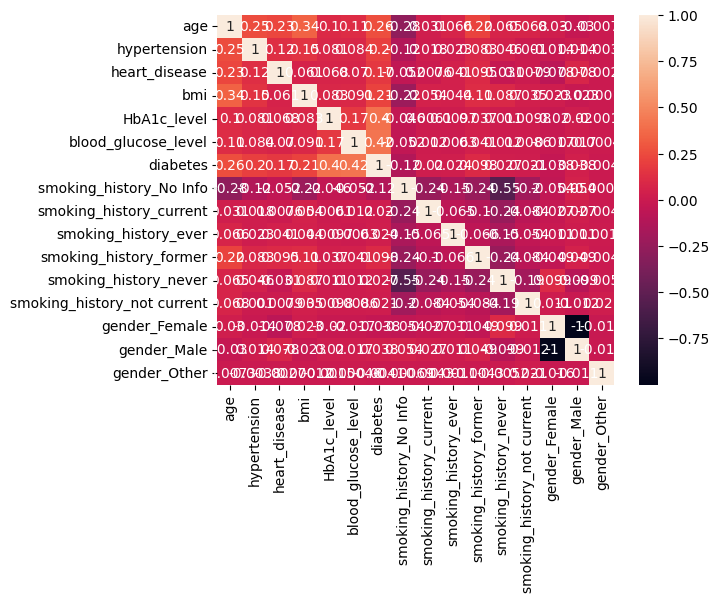

In [86]:
corr = data_s.corr()
print(corr)
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns, annot = True)

<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

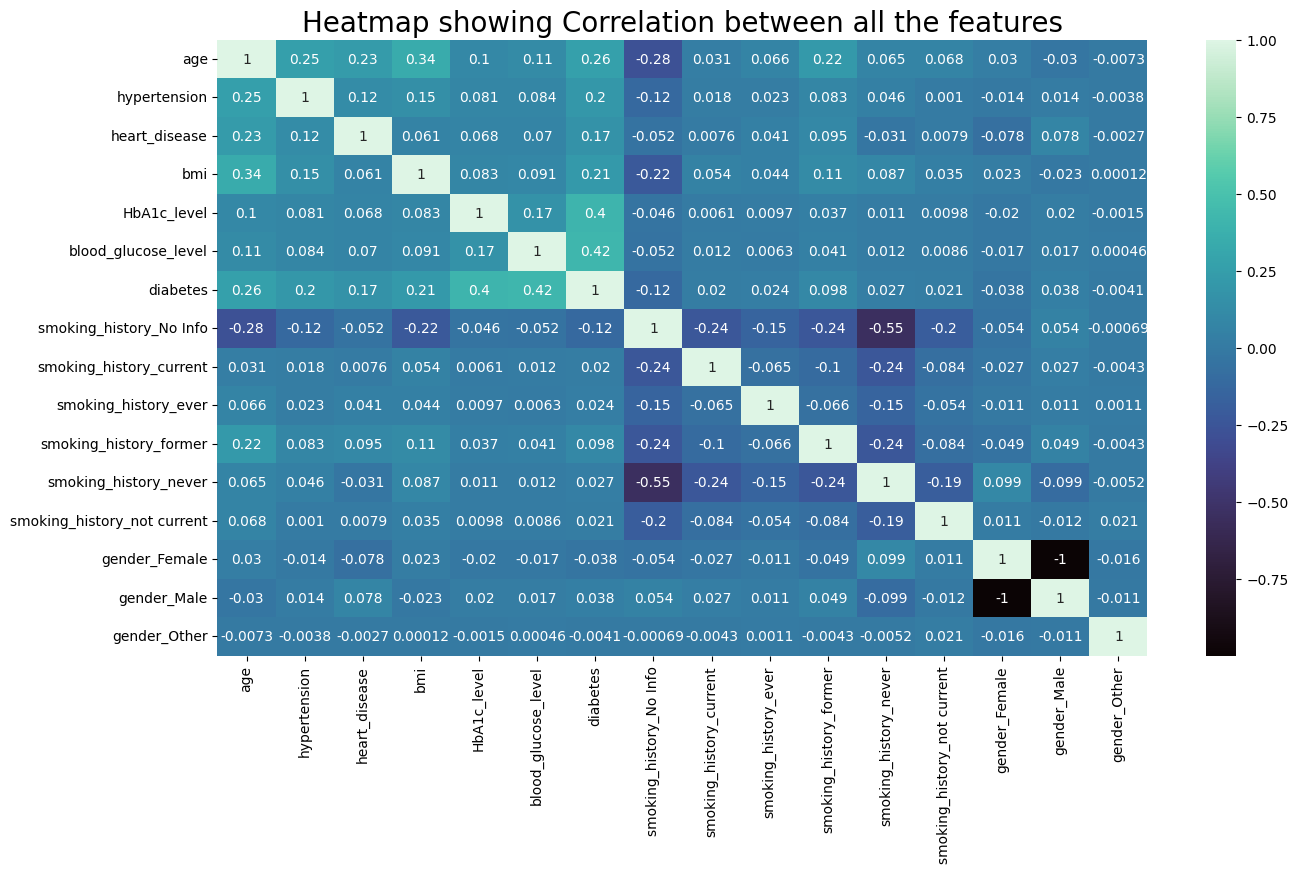

In [88]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(data_s.corr(),annot = True, cmap='mako')

In [92]:
z_class = data_s[data_s.diabetes==0]
z_class.shape

(91500, 16)

In [94]:
o_class = data_s[data_s.diabetes==1]
o_class.shape

(8500, 16)

In [95]:
# Scaling the data using Standard Scaler
scaler = StandardScaler()
scaled = scaler.fit(data_s.drop('diabetes',axis=1)).transform(data_s.drop('diabetes',axis=1))
df_scaled = pd.DataFrame(scaled, columns=data_s.columns[:-1])
df_scaled.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male
0,1.692704,-0.284439,4.936379,-0.321056,1.001706,0.047704,-0.747008,-0.319946,-0.20423,-0.321198,1.359930,-0.262512,0.841358,-0.841046,-0.013418
1,0.538006,-0.284439,-0.202578,-0.000116,1.001706,-1.426210,1.338674,-0.319946,-0.20423,-0.321198,-0.735332,-0.262512,0.841358,-0.841046,-0.013418
2,-0.616691,-0.284439,-0.202578,-0.000116,0.161108,0.489878,-0.747008,-0.319946,-0.20423,-0.321198,1.359930,-0.262512,-1.188554,1.188995,-0.013418
3,-0.261399,-0.284439,-0.202578,-0.583232,-0.492690,0.416183,-0.747008,3.125524,-0.20423,-0.321198,-0.735332,-0.262512,0.841358,-0.841046,-0.013418
4,1.515058,3.515687,4.936379,-1.081970,-0.679490,0.416183,-0.747008,3.125524,-0.20423,-0.321198,-0.735332,-0.262512,-1.188554,1.188995,-0.013418


In [97]:
# Splitting the columns in to dependent variable (x) and independent variable (y).
x = df_scaled
y = data_s['diabetes']
x,y.head()

(            age  hypertension  heart_disease       bmi  HbA1c_level  \
 0      1.692704     -0.284439       4.936379 -0.321056     1.001706   
 1      0.538006     -0.284439      -0.202578 -0.000116     1.001706   
 2     -0.616691     -0.284439      -0.202578 -0.000116     0.161108   
 3     -0.261399     -0.284439      -0.202578 -0.583232    -0.492690   
 4      1.515058      3.515687       4.936379 -1.081970    -0.679490   
 ...         ...           ...            ...       ...          ...   
 99995  1.692704     -0.284439      -0.202578 -0.000116     0.628107   
 99996 -1.771388     -0.284439      -0.202578 -1.499343     0.908306   
 99997  1.070944     -0.284439      -0.202578  0.076729     0.161108   
 99998 -0.794336     -0.284439      -0.202578  1.220361    -1.426688   
 99999  0.671241     -0.284439      -0.202578 -0.736922     1.001706   
 
        blood_glucose_level  diabetes  smoking_history_No Info  \
 0                 0.047704 -0.747008                -0.319946   
 1

In [98]:
x

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male
0,1.692704,-0.284439,4.936379,-0.321056,1.001706,0.047704,-0.747008,-0.319946,-0.20423,-0.321198,1.359930,-0.262512,0.841358,-0.841046,-0.013418
1,0.538006,-0.284439,-0.202578,-0.000116,1.001706,-1.426210,1.338674,-0.319946,-0.20423,-0.321198,-0.735332,-0.262512,0.841358,-0.841046,-0.013418
2,-0.616691,-0.284439,-0.202578,-0.000116,0.161108,0.489878,-0.747008,-0.319946,-0.20423,-0.321198,1.359930,-0.262512,-1.188554,1.188995,-0.013418
3,-0.261399,-0.284439,-0.202578,-0.583232,-0.492690,0.416183,-0.747008,3.125524,-0.20423,-0.321198,-0.735332,-0.262512,0.841358,-0.841046,-0.013418
4,1.515058,3.515687,4.936379,-1.081970,-0.679490,0.416183,-0.747008,3.125524,-0.20423,-0.321198,-0.735332,-0.262512,-1.188554,1.188995,-0.013418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.692704,-0.284439,-0.202578,-0.000116,0.628107,-1.180558,1.338674,-0.319946,-0.20423,-0.321198,-0.735332,-0.262512,0.841358,-0.841046,-0.013418
99996,-1.771388,-0.284439,-0.202578,-1.499343,0.908306,-0.934905,1.338674,-0.319946,-0.20423,-0.321198,-0.735332,-0.262512,0.841358,-0.841046,-0.013418
99997,1.070944,-0.284439,-0.202578,0.076729,0.161108,0.416183,-0.747008,-0.319946,-0.20423,3.113342,-0.735332,-0.262512,-1.188554,1.188995,-0.013418
99998,-0.794336,-0.284439,-0.202578,1.220361,-1.426688,-0.934905,-0.747008,-0.319946,-0.20423,-0.321198,1.359930,-0.262512,0.841358,-0.841046,-0.013418


In [99]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

SVM IMPLEMENTATION


In [102]:
# Split data in to train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [105]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC


In [106]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [107]:
y_pred = model.predict(X_test)

In [108]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18297
           1       0.86      0.65      0.74      1703

    accuracy                           0.96     20000
   macro avg       0.91      0.82      0.86     20000
weighted avg       0.96      0.96      0.96     20000

Confusion Matrix:
[[18114   183]
 [  601  1102]]


In [109]:
# Apply SVM Model
model = SVC()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.963


<Axes: >

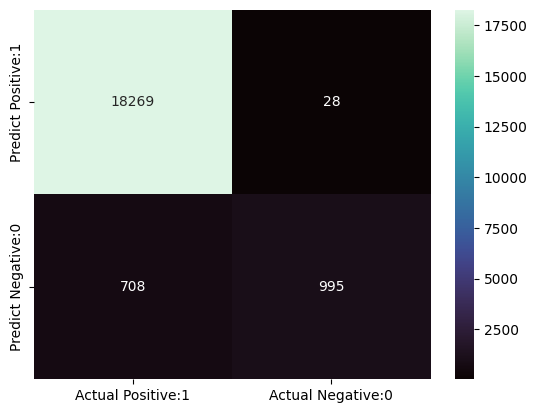

In [110]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [111]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18297
           1       0.97      0.58      0.73      1703

    accuracy                           0.96     20000
   macro avg       0.97      0.79      0.86     20000
weighted avg       0.96      0.96      0.96     20000



In [112]:
# save the model to disk
import pickle
pickle.dump(model, open('PRACTICAL.pkl','wb'))